# Question 1

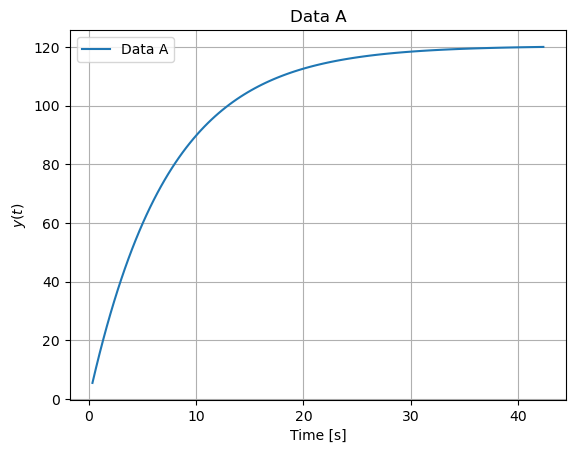

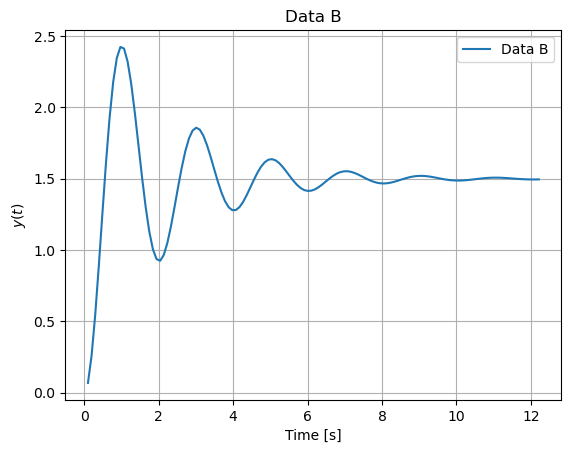

In [1]:
# Read the archives HW2_ex1_data.csv and HW2_ex2_data.csv and plot the data using matplotlib. 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal
from control import step_info

dataA = pd.read_csv('HW2_ex1_dataA.csv')
dataB = pd.read_csv('HW2_ex2_dataA.csv')

plt.figure()
plt.plot(dataA.iloc[:, 0], dataA.iloc[:, 1], label='Data A')
plt.grid()
plt.ylabel('$y(t)$')
plt.xlabel('Time [s]')
plt.title('Data A')
plt.legend()
plt.savefig('Q1_DataA.pdf')
plt.show()

plt.figure()
plt.plot(dataB.iloc[:, 0], dataB.iloc[:, 1], label='Data B')
plt.grid()
plt.ylabel('$y(t)$')
plt.xlabel('Time [s]')
plt.title('Data B')
plt.legend()
plt.savefig('Q1_DataB.pdf')
plt.show()




Data A:
a = 0.13521s
T_r = 16.271s
T_s = 29.584s
K = 16.237
G(s) = 16.237/(s+0.13521)


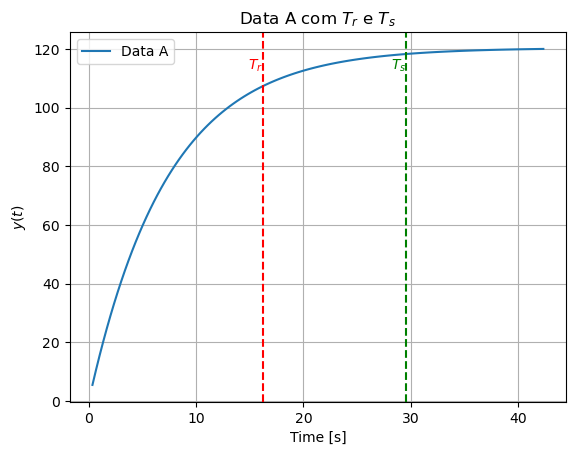

In [2]:
# Para Data A
# Para achar o valor da constante de tempo a, em um sistema de primeira ordem, sabemos que a é o tempo que leva para a função de transferência atingir 63.2% do valor final.
# Para achar o valor do ganho K, sabemos que K é o valor final da função de transferência.
# Fazendo o código para achar esses valores:

# Data A
y_final_A = dataA.iloc[-1, 1]
a_A = 0
for i in range(len(dataA)):
    if dataA.iloc[i, 1] >= 0.632 * y_final_A:
        a_A = dataA.iloc[i, 0]
        break

a_A = 1/a_A
print('Data A:')
print(f'a = {a_A:.5}s')

# O tempo de subida é definido como T_r = 2.2/a
# O tempo de acomodação é definido como T_s = 4/a

T_r_A = 2.2/a_A
T_s_A = 4/a_A

print(f'T_r = {T_r_A:.5}s')
print(f'T_s = {T_s_A:.5}s')

# A função de transferência é dada por G(s) = K/(s+a)
# Já para definir K, usamos K/a = y_final, então K = y_final*a

K_A = y_final_A * a_A

print(f'K = {K_A:.5}')

# Dessa maneira
print(f'G(s) = {K_A:.5}/(s+{a_A:.5})')

plt.plot(dataA.iloc[:, 0], dataA.iloc[:, 1], label='Data A')
plt.grid()
plt.ylabel('$y(t)$')
plt.xlabel('Time [s]')
plt.title('Data A com $T_r$ e $T_s$')
plt.legend()
plt.axvline(x=T_r_A, color='r', linestyle='--', label='$T_r$')
plt.axvline(x=T_s_A, color='g', linestyle='--', label='$T_s$')
plt.text(T_r_A, plt.ylim()[1]*0.9, '$T_r$', color='r', ha='right')
plt.text(T_s_A, plt.ylim()[1]*0.9, '$T_s$', color='g', ha='right')
plt.savefig('Q1_DataA_Ts_Tr.pdf')
plt.show()




Data B:
 zeta = 0.14985
 w_n = 3.2774
 a = 0.49111s
 %OS = 62.118%
 T_p = 0.9695s
 T_r = 0.3878s
 T_s = 8.1448s
 K = 16.066
 G(s) = 16.066/(s^2 + 0.98222s + 10.742)


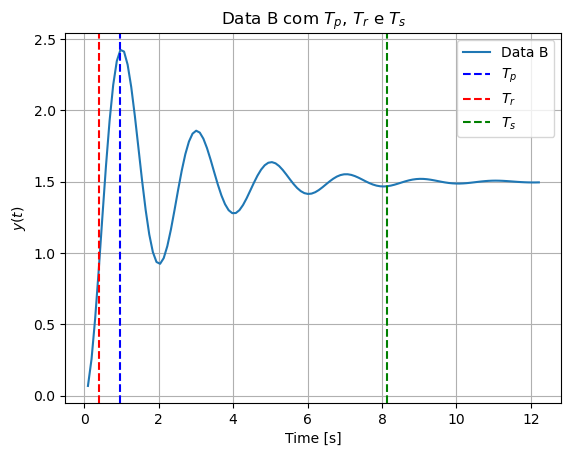

In [9]:
# Para Data B
# Eu consigo definir %OS como (y_max - y_final)/y_final * 100, e o tempo de pico T_p como o tempo que leva para a função de transferência atingir o pico.
y_max_B = dataB.iloc[:, 1].max()
y_final_B = dataB.iloc[-1, 1]
OS_B = (y_max_B - y_final_B)/y_final_B * 100
T_p_B = 0
v_01 = 0
v_09 = 0

# Achando o tempo de pico (Tp), que é o instante que a função de transferência atinge o pico
for i in range(len(dataB)):
    if dataB.iloc[i, 1] == y_max_B:
        T_p_B = dataB.iloc[i, 0]
        break

# Achando o tempo de subida (Tr), que é o tempo que leva para a função de transferência atingir de 10% a 90% do valor final
for index,value in enumerate(dataB.iloc[:, 1]):
    value_ratio = value/y_final_B
    if value/y_final_B >= 0.1 and v_01 == 0:
        v_01 = dataB.iloc[index, 0]
    if value/y_final_B >= 0.9 and v_09 == 0:
        v_09 = dataB.iloc[index, 0]

T_r_B = v_09 - v_01	
        
# A partir do %OS, consigo definir o coeficiente de amortecimento zeta como zeta = -ln(%OS/100)/sqrt(pi^2 + ln(%OS/100)^2)
zeta_B = -np.log(OS_B/100)/np.sqrt(np.pi**2 + ((np.log(OS_B/100))**2))

# A partir de zeta, eu consigo definir w_n como w_n = pi/(T_p * sqrt(1-zeta^2)) e a constante de tempo a como a = zeta*w_n
w_n_B = np.pi/(T_p_B * np.sqrt(1-zeta_B**2))
a_B = zeta_B * w_n_B

# Agora calculandoe T_s
T_s_B = 4/a_B

# Achando K para um sistema de segunda ordem com subamortecimento, temos que K = y_final * w_n^2 
K_B = (y_final_B)*(w_n_B**2)

print('Data B:')
print(f' zeta = {zeta_B:.5}\n w_n = {w_n_B:.5}\n a = {a_B:.5}s\n %OS = {OS_B:.5}%\n T_p = {T_p_B:.5}s\n T_r = {T_r_B:.5}s\n T_s = {T_s_B:.5}s\n K = {K_B:.5}\n G(s) = {K_B:.5}/(s^2 + {2*zeta_B*w_n_B:.5}s + {w_n_B**2:.5})')


plt.plot(dataB.iloc[:, 0], dataB.iloc[:, 1], label='Data B')
plt.grid()
plt.ylabel('$y(t)$')
plt.xlabel('Time [s]')
plt.title('Data B com $T_p$, $T_r$ e $T_s$')
plt.legend()
# Adicionando linhas pontilhadas para T_p, T_r e T_s
plt.axvline(x=T_p_B, color='b', linestyle='--', label='$T_p$')
plt.axvline(x=T_r_B, color='r', linestyle='--', label='$T_r$')
plt.axvline(x=T_s_B, color='g', linestyle='--', label='$T_s$')
plt.legend()
plt.savefig('Q1_DataB_Ts_Tr_Tp.pdf')
plt.show()

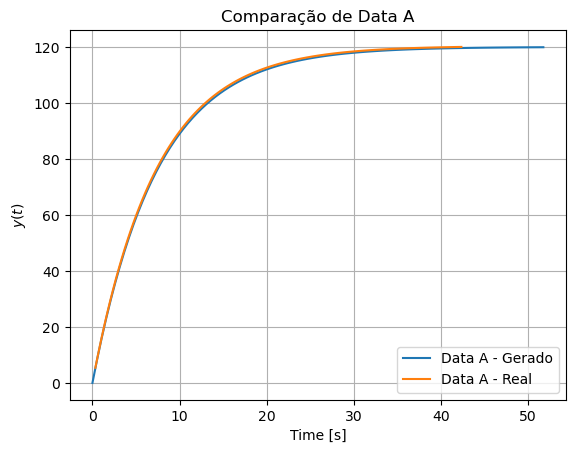

In [4]:
# Definindo a função de transferência do sistema de primeira ordem G(s) = K / (s + a)
num_A = [K_A]
den_A = [1, a_A]
system_A = signal.TransferFunction(num_A, den_A)

# Calculando a resposta ao degrau unitário
t_A, y_A = signal.step(system_A)

# Plotando a resposta ao degrau unitário e os dados
plt.plot(t_A, y_A, label='Data A - Gerado')
plt.plot(dataA.iloc[:, 0], dataA.iloc[:, 1], label='Data A - Real')
plt.grid()
plt.ylabel('$y(t)$')
plt.xlabel('Time [s]')
plt.title('Comparação de Data A')
plt.legend()
#plt.xlim(0.3362, 42.3584)
plt.savefig('Q1_DataA_Comparacao.pdf')
plt.show()

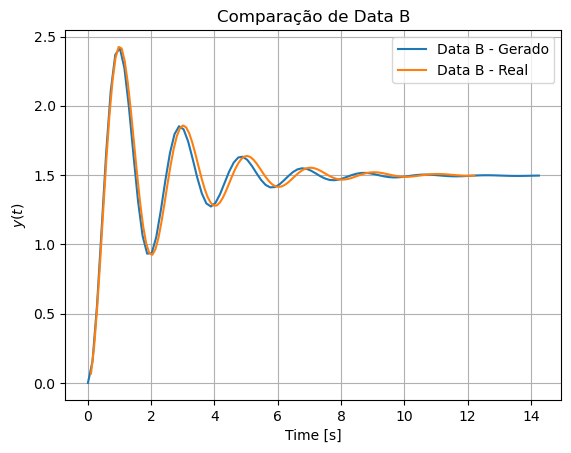

In [5]:
# Definindo a função de transferência do sistema de segunda ordem G(s) = K / (s^2 + 2*zeta*w_n*s + w_n^2)
num_B = [K_B]
den_B = [1, 2*zeta_B*w_n_B, w_n_B**2]
system_B = signal.TransferFunction(num_B, den_B)

t__B, y_B = signal.step(system_B)

plt.plot(t__B, y_B, label='Data B - Gerado')
plt.plot(dataB.iloc[:, 0], dataB.iloc[:, 1], label='Data B - Real')
plt.grid()
plt.ylabel('$y(t)$')
plt.xlabel('Time [s]')
plt.title('Comparação de Data B')
plt.legend()
plt.savefig('Q1_DataB_Comparacao.pdf')
plt.show()
